In [2]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [3]:
data = pd.read_csv("full_data_Pop.csv")
OldData = pd.read_csv("../tracks.csv")




In [4]:
data.head()

,Unnamed: 0,artist_name,track_uri,artist_uri,name,album_uri,duration_ms,album_name,acousticness,danceability,...,tempo,valence,track_popularity,id,popularity,id_artists,release_date,key,mode,time_signature
0,0,Chromatics,spotify:track:7sReVMQAn2dkBi0l9Es5Tv,spotify:artist:4tOVIRjlWWfR1RrAxyRqTE,I'm On Fire,spotify:album:4VqdDLmLf2RJtWwVUEwX9C,245133,In The City,0.6770,0.621,...,129.958,0.318,19.0,04sx4DemzEp9Dzopqge2QX,55,['4tOVIRjlWWfR1RrAxyRqTE'],2006-09-28,10,1,4
1,1,Gabrielle Aplin,spotify:track:1m5eFhE34yyYv2lkjtcKPG,spotify:artist:3w6zswp5THsSKYLICUbDTZ,The Power of Love,spotify:album:0CvseifzOENX6EzsO0OaTA,245160,English Rain,0.9010,0.277,...,75.119,0.175,65.0,0sE9ZTxMxYneIUAEHN4Tg7,52,['3w6zswp5THsSKYLICUbDTZ'],2013-05-13,11,0,3
2,2,Birdy,spotify:track:4RL77hMWUq35NYnPLXBpih,spotify:artist:2WX2uTcsvV5OnS0inACecP,Skinny Love,spotify:album:1WGjSVIw0TVfbp5KrOFiP0,201080,Birdy,0.9520,0.379,...,166.467,0.169,0.0,2hRMHB4ZEYrCBM0d0vVEdq,60,['2WX2uTcsvV5OnS0inACecP'],2011-11-07,4,1,4
3,3,HAIM,spotify:track:1vSEwZtoQA0sJxkOgF7MtG,spotify:artist:4Ui2kfOqGujY81UcPrb5KE,Falling,spotify:album:7CzrzGbCwqT8Y43tvIUPBX,257813,Days Are Gone,0.0792,0.743,...,111.980,0.265,0.0,1vSEwZtoQA0sJxkOgF7MtG,52,['4Ui2kfOqGujY81UcPrb5KE'],2013-01-01,2,1,4
4,4,Sara Bareilles,spotify:track:4oa14QBfWRDfJy2agySy0L,spotify:artist:2Sqr0DXoaYABbjBo9HaMkM,Gravity,spotify:album:2Z9WUERfMjOgQ6ze9TcGbF,232760,Little Voice,0.8340,0.270,...,168.964,0.231,27.0,4oa14QBfWRDfJy2agySy0L,71,['2Sqr0DXoaYABbjBo9HaMkM'],2007-07-03,0,1,4


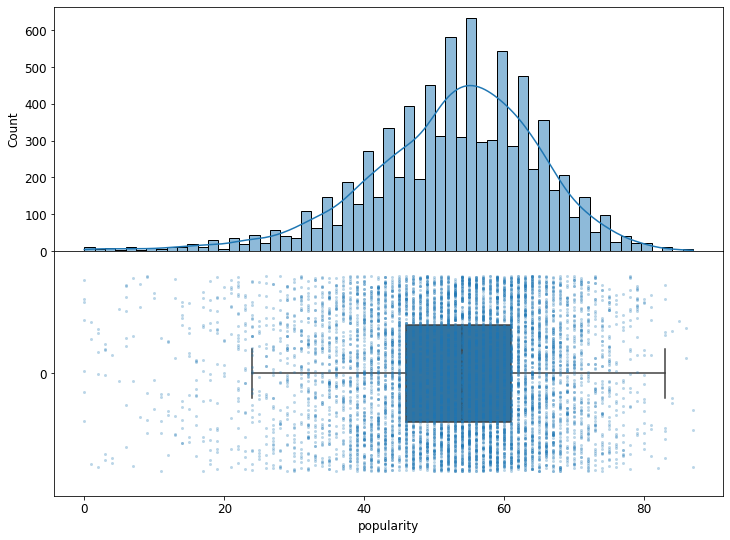

In [5]:
fig, axs = plt.subplots(nrows=2)

sns.histplot(
    data['popularity'],
    kde=True,
    ax=axs[0]
)

sns.stripplot(
    data['popularity'], 
    orient='h',
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    data['popularity'],
    orient='h',
    width=0.4, 
    ax=axs[1],
    showfliers=False,
)
# Align axes
spacer = np.max(data['popularity']) * 0.05
xmin = np.min(data['popularity']) - spacer
xmax = np.max(data['popularity']) + spacer



# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].set_facecolor('white')


From the graphs it can be seen how our processed data's popularity is distributed, compared to the earlier versions of the data, many low popularity songs have been ommitted. Whilst this was not a direct intention, we suspect that this will also help us create a better image of how popularity of a song is affected by the audio features, since Spotify has a lot of songs, a lot which will not get much attention with just sheer oversaturation of the digital music industry, thus we think that having excluded most of them will give us a more up close picture at how audio features of a 'good' song can make it 'great'.



In [6]:
data['popularity'].describe()



count    8309.000000
mean       52.681670
std        12.375927
min         0.000000
25%        46.000000
50%        54.000000
75%        61.000000
max        87.000000
Name: popularity, dtype: float64

Thus we can see the most of the data has around 50 popularity, standard deviation helps us undertand that most of the data falls between 40 and 65. 

We also see the song with highest popularity is only 87, meaning that the higher percentile is more densily packed, as the spread is from 61-87, compared to the lower percentile, which is more spread out, from 0-46 as the minimum value is 0.

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'acousticness'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'loudness'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'track_popularity'),
 Text(12.5, 0, 'popularity'),
 Text(13.5, 0, 'key'),
 Text(14.5, 0, 'mode'),
 Text(15.5, 0, 'time_signature')]

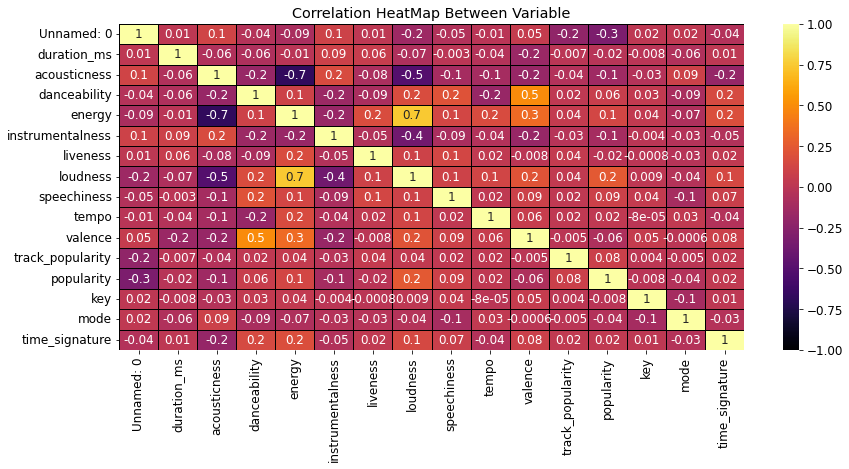

In [7]:
corr_df = data.corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor = "Black")
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

From the correlation matrix, we see that for popularity, loudness seems to be the biggest correlated factor. We also see that there is a strong correlation of loudness with energy, acousticness, and instrumentalness, that should be further examined, to further understand the influence of loudness on popularity as well.

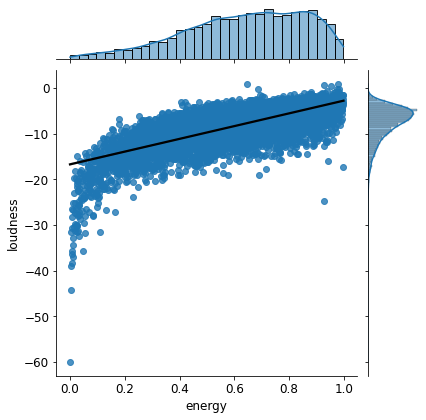

In [8]:
sns.jointplot(
    x='energy', 
    y='loudness', 
    data=data,
#    stat_func=None,
    kind="reg",
    line_kws={
        'color': 'black'
    }
)

From the above graph we can confirm that energy and loudness have a correlation between them, we also see the distribution of loudness and energy, where we can observe that loudness has a few outliers in the data which has much lower loudness to the average loudness.